In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import seaborn as sns
import scipy.stats as stats


#these are user defined modules
import plot
import calculate

### Cohort Analysis

For each (filtered) cohort analyze how the distribution of publications and citations changes in the cohort over time.
At the beginning all scientists should be equal (they have zero publications and citations). Over time some scientists become more productive and/or successful than others which leads to an increase in the Gini coefficient.

In [2]:
start_time = timeit.default_timer()
print(start_time)

1510924811.98


### Read Gender details

In [3]:
# read gender details - the column names are name, gender - change it to author, gender
gender = pd.read_csv('./data/name_gender_1970_2016_noAsians.csv')
gender.rename(columns={'name':'author'}, inplace=True)
print(gender.head())
print(gender['gender'].unique())
print(gender.groupby('gender').size())
#TODO: also show proportion! What is the percentage of men and women?

print(gender['author'].nunique())

             author gender
0    nima mesgarani      m
1    james j. abbas      m
2  eberhart zrenner      m
3    emery n. brown      m
4        ilya rybak      m
['m' 'none' 'f']
gender
f        974493
m       4493870
none     325482
dtype: int64
1129473


### Read authors with start and end year details

In [4]:
CAREER_LENGTH_LIST = [0,5,10,15,20,25]
CAREER_LENGTH = 0
#max_years = 15
#authorStartEndCareerData = pd.read_csv('data/authors-scientific-start-end-year-publish-count.csv')
authorStartEndCareerData = pd.read_csv('./data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')

print('authorStartEndCareerData before filtering - ',authorStartEndCareerData.shape[0])
authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData["start_year"] >= 1970]
print('authorStartEndCareerData after filtering - ',authorStartEndCareerData.shape[0])

#authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')
print(authorStartEndCareerData.head())

#print("authorStartEndCareerData  %s", authorStartEndCareerData.shape[0])
print("author unique names  - ", authorStartEndCareerData['author'].nunique())
#print(authorStartEndCareerData[authorStartEndCareerData['author']=='a min tjoa'])

('authorStartEndCareerData before filtering - ', 1708185)
('authorStartEndCareerData after filtering - ', 1708185)
                  author  start_year  end_year  total_num_pub  career_length
0       'maseka lesaoana        2001      2015              2             14
1  (max) zong-ming cheng        2009      2011              2              2
2       (zhou) bryan bai        2011      2012              2              1
3                  a lun        2010      2010              1              0
4             a min tjoa        1979      2015            193             36
('author unique names  - ', 1708185)


### Merge credible authors and their gender information

In [5]:
authorStartEndCareerData = pd.merge(authorStartEndCareerData, gender, how="left", on=["author"])
# for authors whose gender not found, replace it with none
authorStartEndCareerData['gender'] = authorStartEndCareerData['gender'].fillna('none')
print(authorStartEndCareerData.head())

print("authorStartEndCareerData with duplicates: %s", authorStartEndCareerData.shape[0])
authorStartEndCareerData = authorStartEndCareerData.drop_duplicates()
print("authorStartEndCareerData no duplicates: %s", authorStartEndCareerData.shape[0])
# print(authorStartEndCareerData['author'].nunique())

#axes = authorStartEndCareerData.boxplot(column='pub_count', by='gender', return_type='axes')
#for ax in axes.values():
#    ax.set_ylim(0, 200)
#plt.show()

                  author  start_year  end_year  total_num_pub  career_length  \
0       'maseka lesaoana        2001      2015              2             14   
1       'maseka lesaoana        2001      2015              2             14   
2  (max) zong-ming cheng        2009      2011              2              2   
3       (zhou) bryan bai        2011      2012              2              1   
4                  a lun        2010      2010              1              0   

  gender  
0   none  
1   none  
2   none  
3   none  
4   none  
('authorStartEndCareerData with duplicates: %s', 6372557)
('authorStartEndCareerData no duplicates: %s', 1708185)


### Read Publication data

In [6]:
authorPublicationData = pd.read_csv('./data/author_publications_1970_2016_asiansAsNone.txt')
print('authorPublicationData before filtering - ',authorPublicationData.shape[0])
authorPublicationData = authorPublicationData[authorPublicationData["year"] >= 1970]
print('authorPublicationData after filtering - ',authorPublicationData.shape[0])

authorPublicationData = authorPublicationData.groupby(['year','author']).count().reset_index()
authorPublicationData.rename(columns={'pub_id':'num_pub'}, inplace=True)
print(authorPublicationData.head())

##remove wrong data
#authorPublicationData = authorPublicationData[authorPublicationData["year"] > 1900]
#print(authorPublicationData[authorPublicationData.author=="a min tjoa"])

('authorPublicationData before filtering - ', 9078240)
('authorPublicationData after filtering - ', 9078240)
   year         author  num_pub
0  1970    a. a. afifi        1
1  1970    a. a. bährs        1
2  1970     a. armenti        1
3  1970  a. b. slomson        1
4  1970    a. brindley        1


### Merge Publications with credible authors and their gender information

('authorPublicationData before filtering: %s', 4704589)
('authorPublicationData after filtering: %s', 4704589)
('authorPublicationData with duplicates: %s', 4704589)
('authorPublicationData no duplicates: %s', 4704589)
1708185
   year         author  num_pub  start_year  end_year  total_num_pub  \
0  1970    a. a. afifi        1        1970      1970              1   
1  1970    a. a. bährs        1        1970      1970              1   
2  1970     a. armenti        1        1970      1970              1   
3  1970  a. b. slomson        1        1970      1970              1   
4  1970    a. brindley        1        1970      2002              2   

   career_length gender  
0              0   none  
1              0   none  
2              0   none  
3              0   none  
4             32   none  


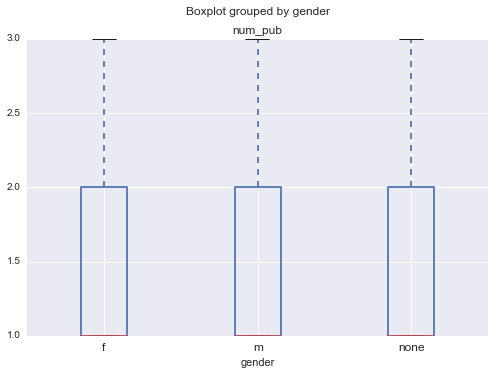

In [7]:
authorPublicationData = pd.merge(authorPublicationData, authorStartEndCareerData,  
                                          how="left", left_on="author", right_on="author")

print("authorPublicationData before filtering: %s", authorPublicationData.shape[0])
authorPublicationData = authorPublicationData.dropna(how='any')
print("authorPublicationData after filtering: %s", authorPublicationData.shape[0])

print("authorPublicationData with duplicates: %s", authorPublicationData.shape[0])
authorPublicationData = authorPublicationData.drop_duplicates()
print("authorPublicationData no duplicates: %s", authorPublicationData.shape[0])

#print(authorPublicationData.head(n=2))
print(authorPublicationData['author'].nunique())
#print(authorPublicationData.shape[0])

print(authorPublicationData.head())
#print(authorPublicationData[authorPublicationData.author=="a min tjoa"])


authorPublicationData.boxplot(column='num_pub', by='gender', showfliers=False)
plt.show()

In [8]:
groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 1, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   
156919  1989  donatella sciuto        1        1985      2016            348   
181582  1990  donatella sciuto        2        1985      2016            348   
210693  1991  donatella sciuto        4        1985      2016            348   
243763  1992  donatella sciuto        4        1985      2016            348   
282907  1993  donatella sciuto        9        1985      2016            348   
329488  1994  donatella sciuto       13        1985      2016            348   
381623  1995  donatella sciuto       15        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31     

In [16]:
author_list = ['a','b','c','d','e']
df_first_values = pd.DataFrame(data={'author':author_list, 'prev_value':[0]*len(author_list)})
print(df_first_values.head())

second_list = ['a','c','e']
df_sec_values = pd.DataFrame(data={'author':second_list, 'curr_value':range(10,10+len(second_list))})
print(df_sec_values.head())


df_merge = pd.merge(df_first_values,df_sec_values,how='left',on='author')
print(df_merge.head())

df_merge.replace(to_replace=np.NaN,value=0,inplace=True)
print(df_merge.head())

df_merge['prev_value'] = df_merge['prev_value'] + df_merge['curr_value']
print(df_merge.head())

df_merge = df_merge[['author','prev_value']]
print(df_merge.head())

# Let us do it one more time

third_list = ['d','e','f']
df_third_values = pd.DataFrame(data={'author':third_list, 'curr_value':range(5,5+len(third_list))})
print(df_third_values.head())


df_merge = pd.merge(df_merge,df_third_values,how='left',on='author')
print(df_merge.head())

df_merge.replace(to_replace=np.NaN,value=0,inplace=True)
print(df_merge.head())

df_merge['prev_value'] = df_merge['prev_value'] + df_merge['curr_value']
print(df_merge.head())

df_merge = df_merge[['author','prev_value']]
print(df_merge.head())

  author  prev_value
0      a           0
1      b           0
2      c           0
3      d           0
4      e           0
  author  curr_value
0      a          10
1      c          11
2      e          12
  author  prev_value  curr_value
0      a           0          10
1      b           0         NaN
2      c           0          11
3      d           0         NaN
4      e           0          12
  author  prev_value  curr_value
0      a           0          10
1      b           0           0
2      c           0          11
3      d           0           0
4      e           0          12
  author  prev_value  curr_value
0      a          10          10
1      b           0           0
2      c          11          11
3      d           0           0
4      e          12          12
  author  prev_value
0      a          10
1      b           0
2      c          11
3      d           0
4      e          12
  author  curr_value
0      d           5
1      e           6
2      

In [32]:
df_temp = pd.DataFrame(data=groupByYearData[['author','gender']])
print(df_temp.head())
df_temp['new'] = [0] * df_temp.shape[0]
print(df_temp.head())

                author gender
0          a. a. afifi   none
1        nathan newman      m
2  natarajan annamalai      m
3       nasser golshan      m
4          n. u. ahmed   none
                author gender  new
0          a. a. afifi   none    0
1        nathan newman      m    0
2  natarajan annamalai      m    0
3       nasser golshan      m    0
4          n. u. ahmed   none    0


In [35]:
def plot_cohort_analysis_on(data, criterion, max_years, criteria_display):
    # data - the dataframe containing author publications or citations data
    # criterion - 'cum_num_pub' (or) 'cum_num_cit' (or) 'num_pub' (or) 'num_cit'
      # If you are referring to cumulative values then the name should start with 'cum_'
    # max_years - no. of years the analysis need to be carried out
    # criteria_display - 'Cumulative Publication Count' (or) 'Cumulative Citation Count'
    
    # get the years data - 
    years = data['year'].unique() 
    years = sorted(years)
    
    #if years are grouped then get the step limit
    step = years[1] - years[0]
    
    gini_per_cohort = pd.DataFrame(index=years)
    cumnum_per_cohort = pd.DataFrame(index=years)

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(1,1,1)
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(1,1,1)

    # limit plot to the N years during which we follow a cohort
    cohort_duration = np.arange(max_years)

    fig5 = plt.figure(figsize=(40,20))

    i=1 # to point to the right figure
    
    
    # For each cohort, iterate all their careers and calculate the inequality of productivity (publications)
    # or success (citations)

    for year in years: #[1975,1980,1985, 1990] - if step size is 5: #
        #we cannot follow the cohort for max years; for 2016 we do not have enough data
        if year > (2015 - (max_years*step)):
            break

        ax5 = fig5.add_subplot(6, 6, i)
        i = i+1

        fig4 = plt.figure()
        ax4 = fig4.add_subplot(1, 1, 1)
        
        #get the cohort names

        cohort = data[data["start_year"]==year]
        cohort_authors = cohort["author"].values
        
        #It is used to maintain previous values in cumulative calculations otherwise 0
        df_values = pd.DataFrame(cohort[['author', 'gender']])
        df_values['prev_value'] = [0]* df_values.shape[0]

        gini_over_years = pd.Series(data=0, index=years)
        cumnum_over_years = pd.DataFrame(data=0, index=years, \
                                         columns=["mean", "std", "mean_f", "std_f", "mean_m", "std_m", "mean_n", "std_n"])

        subsequent_years = [yr for yr in years if yr >= year]

        # extract num publications/citations for the cohort in all future years
        for y in subsequent_years:
            #print("following years: "+str(y))

            # get all the authors data for each year and filter based on the authors that we are interested in
            temp = data[data["year"]==y]
            temp = temp[temp["author"].isin(cohort_authors)]
            
            df_values = pd.merge(df_values,temp[['author',criterion]],how='left',on='author')
            
            #Take the current values. If NaN or None then consider the previous values
            df_values[criterion] = df_values[criterion].combine_first(df_values['prev_value'])

            # If it is cumulative then previous values is set with current
            # Otherwise previous value will always will be 0
            if(criterion.startswith('cum_')) :
                df_values['prev_value'] = df_values[criterion]

            temp_count = len(df_values[criterion].astype("float").values)
            
            if temp_count > 0:
                # gini per year based on cumulative num of publications/citations of all authors in this year
                gini_over_years.loc[y] = calculate.gini(temp[criterion].astype("float").values)
                #cohort_len[len(cohort_len)-1]['actual'].append(temp[criterion].values.shape[0])
                #print(temp[criterion].astype("float").values.)

                temp_male = df_values[df_values["gender"]=="m"]
                temp_female = df_values[df_values["gender"]=="f"]
                temp_none = df_values[df_values["gender"]=="none"]

                cumnum_over_years.loc[y] = [np.mean(df_values[criterion].astype("float").values), 
                                               np.std(df_values[criterion].astype("float").values),
                                               np.mean(temp_female[criterion].astype("float").values), 
                                               stats.sem(temp_female[criterion].astype("float").values),
                                               np.mean(temp_male[criterion].astype("float").values), 
                                               stats.sem(temp_male[criterion].astype("float").values),
                                               np.mean(temp_none[criterion].astype("float").values), 
                                               stats.sem(temp_none[criterion].astype("float").values)]
            else:
                gini_over_years.loc[y] = 0
                cumnum_over_years.loc[y] = [0, 0, 0, 0, 0, 0, 0, 0]
                
            print(df_values)
            # maintain only author and prev_value for calculations    
            df_values = df_values[['author','gender','prev_value']]
            
            

        gini_years_df = pd.DataFrame(gini_over_years.reset_index())
        gini_years_df.columns = ["year", "gini"]
        #gini_per_cohort[year] = gini_years_df

        gini_years = gini_years_df["year"].values
        gini_coefs= gini_years_df["gini"].values
        selected_gini_df = gini_years_df[(gini_years_df["year"] >= year) &  \
                                         (gini_years_df["year"] < (year+(max_years*step)))]

        ax2.plot(cohort_duration, selected_gini_df["gini"])

        #["mean", "std", "mean_f", "std_f", "mean_m", "std_m", "mean_n", "std_n"])
        cumnum_years_df = pd.DataFrame(cumnum_over_years.reset_index())
        cumnum_years_df.columns = ["year", "mean", "std", "mean_f", "sem_f", "mean_m", "sem_m", "mean_n", "sem_n"]

        selected_cumnum_df = cumnum_years_df[(cumnum_years_df["year"] >= year) &  \
                                             (cumnum_years_df["year"] < (year+(max_years*step)))]
        ax3.errorbar(cohort_duration, selected_cumnum_df["mean"].values,  yerr=selected_cumnum_df["std"].values)


        ax4 = plot.plot_gender_numcum(ax4, cohort_duration, selected_cumnum_df, year)
        ax4.set_title("Cohort start-year: "+str(year))  
        ax4.set_ylabel(criteria_display)
        ax4.legend()
        fig4.savefig("fig/"+criterion+"_gender_"+str(year)+".png")

        ax5 = plot.plot_gender_numcum(ax5, cohort_duration, selected_cumnum_df, year)
        ax5.set_title("Cohort start-year: "+str(year))
        
        
        break



    ax2.set_ylabel('Gini')
    ax2.set_title('Inequality of al cohorts over '+str(max_years)+' years')
    if len(years)<10:
        ax2.legend(years)  
    fig2.savefig("fig/"+criterion+"_gini.png")

    ax3.set_ylabel(criteria_display)
    ax3.set_title('Mean/Std of al cohorts over '+str(max_years)+' years')
    if len(years)<10:
        ax3.legend(years)  

    fig3.savefig("fig/"+criterion+".png")

    fig5.savefig("fig/"+criterion+"_gender.png")

    plt.show()

                        author gender  prev_value  cum_num_pub
0                  a. a. afifi   none           1            1
1                nathan newman      m           1            1
2          natarajan annamalai      m           1            1
3               nasser golshan      m           1            1
4                  n. u. ahmed   none           1            1
5                    n. prasad   none           1            1
6                   n. l. ford   none           1            1
7                  n. k. gogia   none           1            1
8                  n. k. brown   none           1            1
9                  n. h. price   none           1            1
10                  n. d. cook   none           2            2
11                n. a. palley   none           2            2
12             neal l. walters      m           1            1
13                myron tribus      m           1            1
14             murray j. haims      m           1      

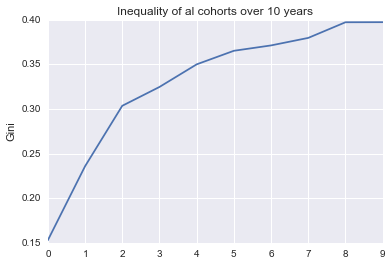

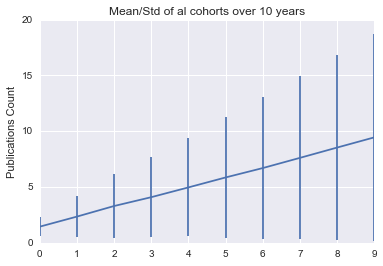

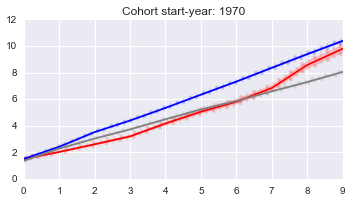

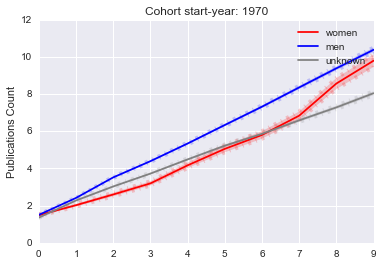

In [37]:
plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', 10, 'Publications Count')

#plot.plot_cohort_analysis_on(groupCitationsByAuthorYearData, 'num_cit', 'Citations Count')

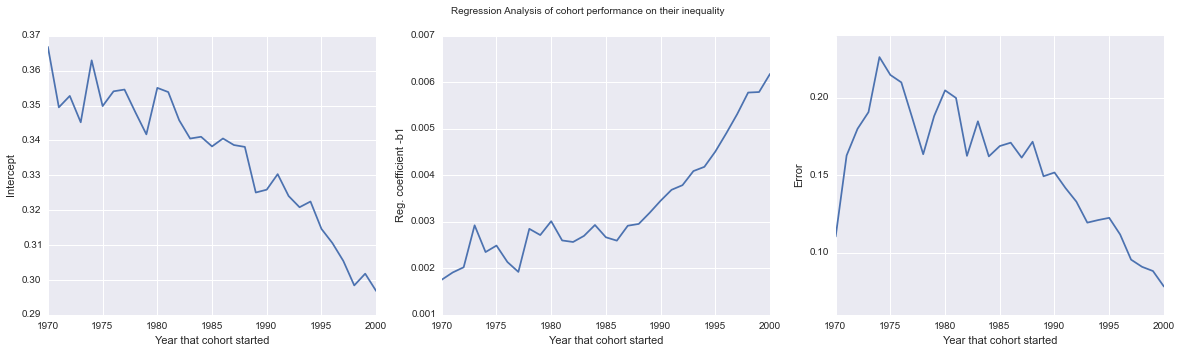

In [26]:
data = plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', 15)